# Time Series Analysis - Air Passengers data.

In [1]:
### Importing the required libraries and statmodels
import pandas as pd
import numpy as np

from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = (15,6)

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading and reading the data.....
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
### Looking at the Month column...
df['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [4]:
### converting it yo datetime dtype
df['Month'] = df['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
df['Month'].head()                   

0   1949-01-15
1   1949-02-15
2   1949-03-15
3   1949-04-15
4   1949-05-15
Name: Month, dtype: datetime64[ns]

In [5]:
### Setting Month column as index 
df.set_index('Month')
df.head()

,Month,#Passengers
0,1949-01-15,112
1,1949-02-15,118
2,1949-03-15,132
3,1949-04-15,129
4,1949-05-15,121


In [6]:
### Getting the dimensions (no of rows and columns)...
df.shape

(144, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


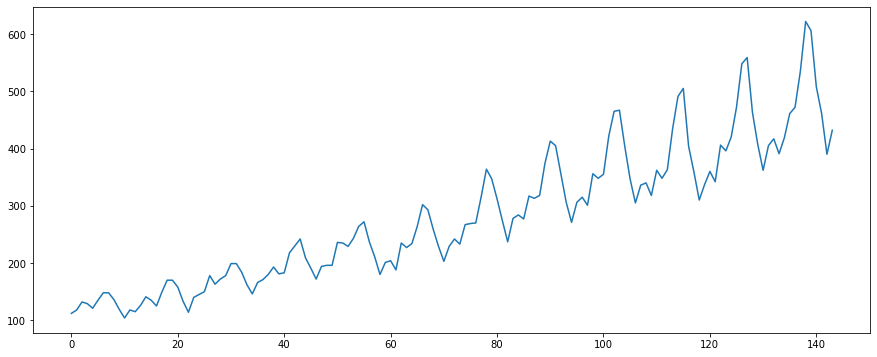

In [8]:
### Plotting the time series 
time_series = df['#Passengers']
plt.plot(time_series)

In [9]:
### Creating a function to test stationarity by Dickey fuller Test....

def test_stationarity(timeseries):
    rol_mean = timeseries.rolling(window = 52, center =False).mean()
    rol_std = timeseries.rolling(window = 52, center =False).std()
    
    orig =plt.plot(timeseries,color ='blue',label ='Original')
    mean = plt.plot(rol_mean,color ='red', label = 'Rolling Mean')
    std = plt.plot(rol_std,color ='black', label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Rolling Standard Deviation')
    plt.show(block = False)
    
    print('The result of Dickey Fuller Test :')
    dftest = adfuller(time_series, autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4],index =['Test Statistic','P value', '#Lags Used','Number of Observations Used'] )
    
    for key,value in dftest[4].items():
        dfoutput['Critical value%s'%key]= value
    print(dfoutput)
    

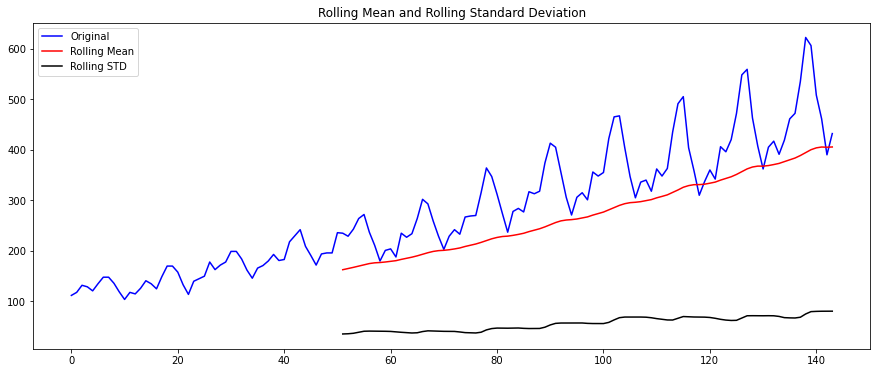

The result of Dickey Fuller Test :
Test Statistic                   0.815369
P value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value1%                -3.481682
Critical value5%                -2.884042
Critical value10%               -2.578770
dtype: float64


In [10]:
### testing the data...
test_stationarity(time_series)

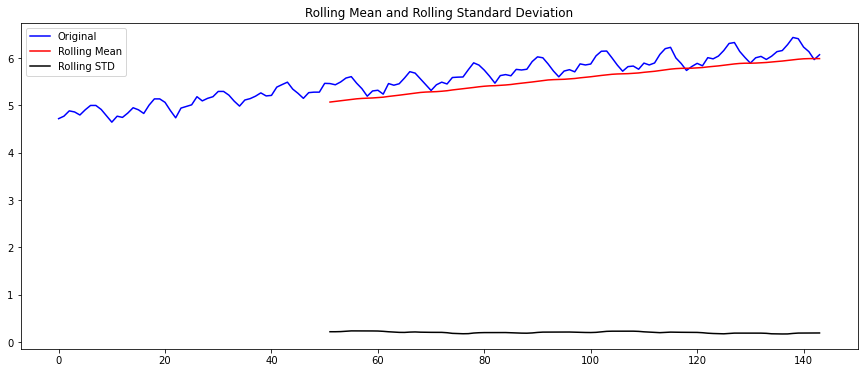

The result of Dickey Fuller Test :
Test Statistic                   0.815369
P value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value1%                -3.481682
Critical value5%                -2.884042
Critical value10%               -2.578770
dtype: float64


In [11]:
### log transformation...
time_series_log = np.log(time_series)
test_stationarity(time_series_log)

In [12]:
### Calculating the Moving Average and  Moving Standard Deviation..
MovingAverage = time_series_log.rolling(window = 12).mean()
MovingSTD = time_series_log.rolling(window = 12).std()

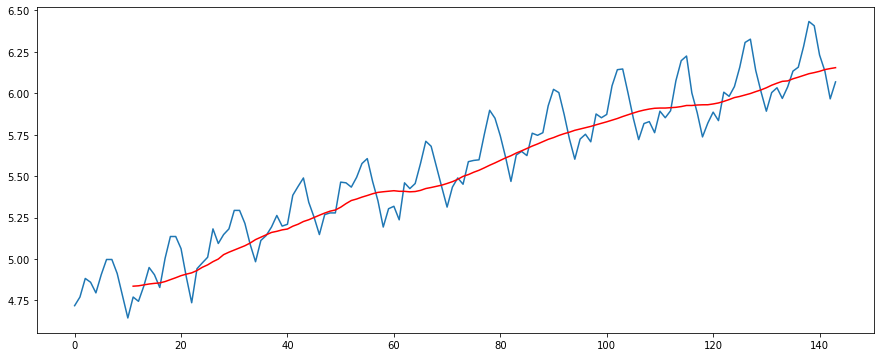

In [13]:
### Plotting the Moving Average...
plt.plot(time_series_log)
plt.plot(MovingAverage, color = 'red')
#plt.plot(MovingSTD, color = 'black')

In [14]:
### Difference b/w log transformed time series and Moving Average...
time_series_log_mv_diff = time_series_log - MovingAverage
time_series_log_mv_diff.head(12)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   -0.065494
Name: #Passengers, dtype: float64

In [15]:
### Dropping the NaN values...
time_series_log_mv_diff.dropna(inplace =True)
time_series_log_mv_diff.head(12)

11   -0.065494
12   -0.093449
13   -0.007566
14    0.099416
15    0.052142
16   -0.027529
17    0.139881
18    0.260184
19    0.248635
20    0.162937
21   -0.018578
22   -0.180379
Name: #Passengers, dtype: float64

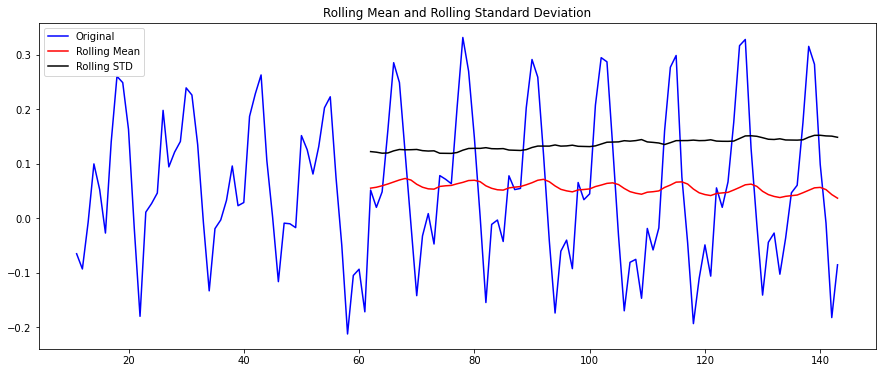

The result of Dickey Fuller Test :
Test Statistic                   0.815369
P value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value1%                -3.481682
Critical value5%                -2.884042
Critical value10%               -2.578770
dtype: float64


In [16]:
### testing the stationarity of the difference...
test_stationarity(time_series_log_mv_diff)

# Beer Production In Australia

In [17]:
## Loading and reading the data.....
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [18]:
### Looking at the Month column...
df['Month'].head()

0    1956-01
1    1956-02
2    1956-03
3    1956-04
4    1956-05
Name: Month, dtype: object

In [19]:
### converting it yo datetime dtype
df['Month'] = df['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
df['Month'].head()                   

0   1956-01-15
1   1956-02-15
2   1956-03-15
3   1956-04-15
4   1956-05-15
Name: Month, dtype: datetime64[ns]

In [20]:
### Setting Month column as index 
df.set_index('Month')
df.head()

,Month,Monthly beer production in Australia
0,1956-01-15,93.2
1,1956-02-15,96.0
2,1956-03-15,95.2
3,1956-04-15,77.1
4,1956-05-15,70.9


In [21]:
### Getting the dimensions (no of rows and columns)...
df.shape

(476, 2)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Month                                 476 non-null    datetime64[ns]
 1   Monthly beer production in Australia  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


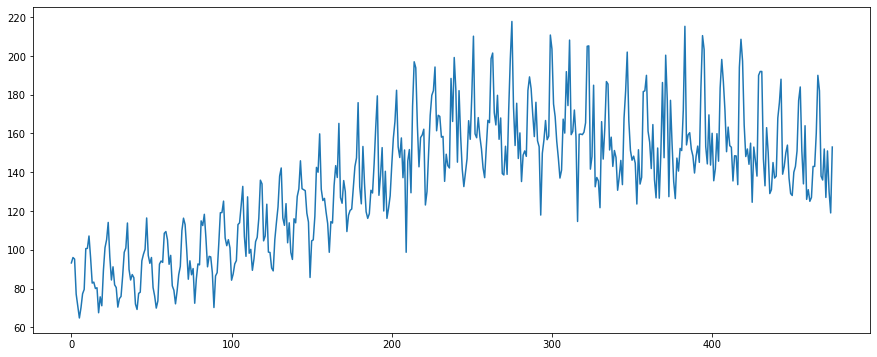

In [23]:
### Plotting the time series 
time_series = df['Monthly beer production in Australia']
plt.plot(time_series)

In [24]:
### Creating a function to test stationarity by Dickey fuller Test....

def test_stationarity(timeseries):
    rol_mean = timeseries.rolling(window = 52, center =False).mean()
    rol_std = timeseries.rolling(window = 52, center =False).std()
    
    orig =plt.plot(timeseries,color ='blue',label ='Original')
    mean = plt.plot(rol_mean,color ='red', label = 'Rolling Mean')
    std = plt.plot(rol_std,color ='black', label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Rolling Standard Deviation')
    plt.show(block = False)
    
    print('The result of Dickey Fuller Test :')
    dftest = adfuller(time_series, autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4],index =['Test Statistic','P value', '#Lags Used','Number of Observations Used'] )
    
    for key,value in dftest[4].items():
        dfoutput['Critical value%s'%key]= value
    print(dfoutput)

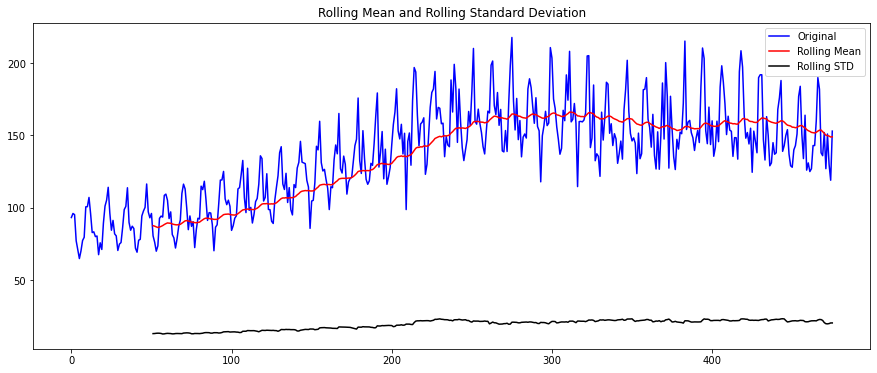

The result of Dickey Fuller Test :
Test Statistic                  -2.282661
P value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical value1%                -3.444709
Critical value5%                -2.867871
Critical value10%               -2.570142
dtype: float64


In [25]:
### testing the data...
test_stationarity(time_series)

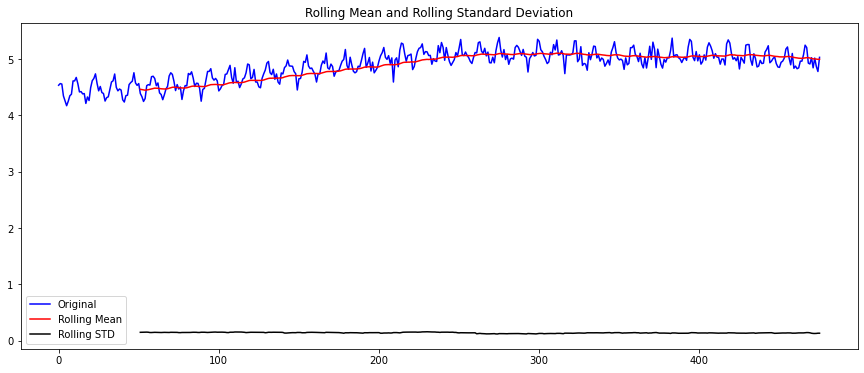

The result of Dickey Fuller Test :
Test Statistic                  -2.282661
P value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical value1%                -3.444709
Critical value5%                -2.867871
Critical value10%               -2.570142
dtype: float64


In [26]:
### log transformation...
time_series_log = np.log(time_series)
test_stationarity(time_series_log)

In [27]:
### Calculating the Moving Average and  Moving Standard Deviation..
MovingAverage = time_series_log.rolling(window = 12).mean()
MovingSTD = time_series_log.rolling(window = 12).std()

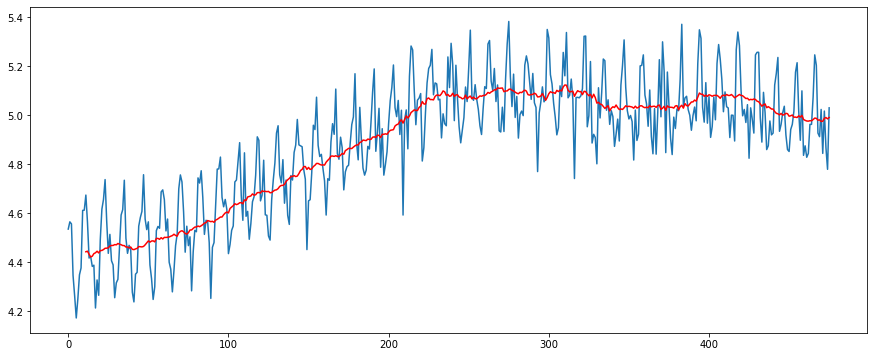

In [28]:
### Plotting the Moving Average...
plt.plot(time_series_log)
plt.plot(MovingAverage, color = 'red')
#plt.plot(MovingSTD, color = 'black')

In [29]:
### Difference b/w log transformed time series and Moving Average...
time_series_log_mv_diff = time_series_log - MovingAverage
time_series_log_mv_diff.head(12)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11    0.23183
Name: Monthly beer production in Australia, dtype: float64

In [30]:
### Dropping the NaN values...
time_series_log_mv_diff.dropna(inplace =True)
time_series_log_mv_diff.head(12)

11    0.231830
12    0.118994
13   -0.015558
14    0.001590
15   -0.041908
16   -0.047399
17   -0.225688
18   -0.117442
19   -0.173166
20    0.045062
21    0.168757
22    0.204867
Name: Monthly beer production in Australia, dtype: float64

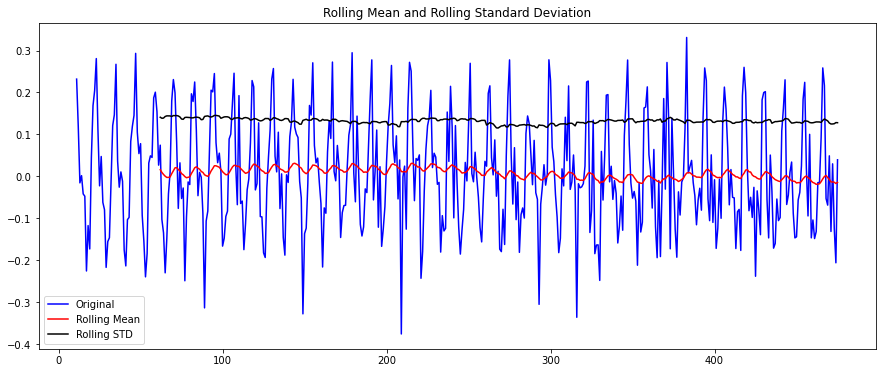

The result of Dickey Fuller Test :
Test Statistic                  -2.282661
P value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical value1%                -3.444709
Critical value5%                -2.867871
Critical value10%               -2.570142
dtype: float64


In [31]:
### testing the stationarity of the difference...
test_stationarity(time_series_log_mv_diff)

In [32]:
### Since the p value is too high we may not reject the null hypothesis, the series is not stationary.